In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import nltk
import string
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
#Result Representation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
scaler = MinMaxScaler()

In [2]:
df=pd.read_csv("/content/insurance.csv")#mounting csv file

In [3]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

<ipython-input-4-40fae92466cf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="region", data=df, palette="Set1")#was just trying to know how many regions are there in this data set


<Axes: xlabel='region', ylabel='count'>

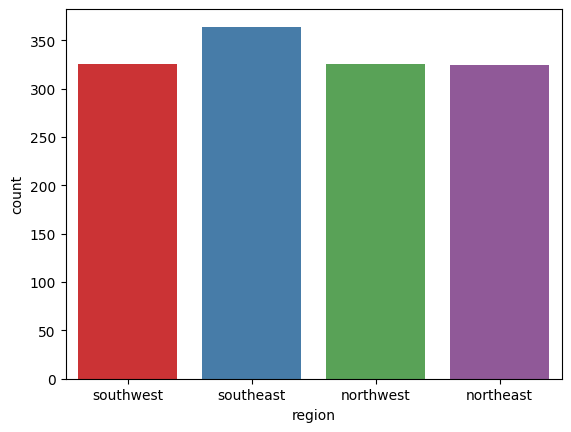

In [4]:
sns.countplot(x="region", data=df, palette="Set1")#was just trying to know how many regions are there in this data set

CONVERTING ALL THE VALUES TO NUMBERS CAUSE ITS EASIER THAT WAY


In [5]:
num={"southwest":0,"southeast":1,"northwest":2,"northeast":3} #I DIDNT KNOW WHAT TO GO WITH SO I JUST WENT WITH 0,1,2,3

In [6]:
df['regionnu'] = df['region'].map(num)

In [7]:
df.drop("region",axis=1,inplace=True)

In [8]:
bin = {'female':1,'male':0}#SETTING UP BINARY

In [9]:
bin1 = {'yes':1,'no':0}

In [10]:
df['bSex'] = df['sex'].map(bin)

In [11]:
df['bsmoker'] = df['smoker'].map(bin1)#mapping my binary to the actuall collums

In [12]:
df['charges'] = df['charges'].astype(int)

In [13]:
df.head()#just checking

,age,sex,bmi,children,smoker,charges,regionnu,bSex,bsmoker
0,19,female,27.900,0,yes,16884,0,1,1
1,18,male,33.770,1,no,1725,1,0,0
2,28,male,33.000,3,no,4449,1,0,0
3,33,male,22.705,0,no,21984,2,0,0
4,32,male,28.880,0,no,3866,2,0,0


In [14]:
df.drop("sex",axis=1,inplace=True)#droping rows with strings

In [15]:
df.drop("smoker",axis=1,inplace=True)

CHECKING FOR CORRELATION BETWEEN DATA

In [16]:
df.corr()#aparently smoking is realted to charges XD

,age,bmi,children,charges,regionnu,bSex,bsmoker
age,1.000000,0.109272,0.042469,0.299009,-0.002127,0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198342,-0.157566,-0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067999,-0.016569,-0.017163,0.007673
charges,0.299009,0.198342,0.067999,1.000000,0.006209,-0.057293,0.787251
regionnu,-0.002127,-0.157566,-0.016569,0.006209,1.000000,0.004588,0.002181
bSex,0.020856,-0.046371,-0.017163,-0.057293,0.004588,1.000000,-0.076185
bsmoker,-0.025019,0.003750,0.007673,0.787251,0.002181,-0.076185,1.000000


REMOVING OUTLIERS


actually i tried running the model without doing this but the accuracy was less than 1%

In [17]:
percentile1 = df['charges'].quantile(0.01)
percentile99 = df['charges'].quantile(0.99)
outliers = df[(df['charges'] < percentile1) | (df['charges'] > percentile99)]#took the top and bottom 1 percentile as outliers

In [18]:
print(outliers)#wanted to see whats to extreme about these

      age     bmi  children  charges  regionnu  bSex  bsmoker
22     18  34.100         0     1137         1     0        0
34     28  36.400         1    51194         0     0        1
175    63  37.700         0    48824         0     1        1
194    18  34.430         0     1137         1     0        0
281    54  40.565         3    48549         3     0        1
442    18  43.010         0     1149         1     0        0
488    44  38.060         0    48885         1     1        1
530    57  42.130         1    48675         1     0        1
543    54  47.410         0    63770         1     1        1
577    31  38.095         1    58571         3     1        1
584    19  20.700         0     1242         0     0        0
663    18  33.660         0     1136         1     0        0
681    19  20.300         0     1242         0     0        0
781    18  41.140         0     1146         1     0        0
791    19  27.600         0     1252         0     0        0
808    1

In [19]:
merged_data = df.merge(outliers,how='left', indicator=True)

In [20]:
df_filtered = merged_data[merged_data['_merge'] == 'left_only'].drop(columns=['_merge'])#removing all outliers

In [21]:
df_filtered.corr()#didnt affect thiss too much

,age,bmi,children,charges,regionnu,bSex,bsmoker
age,1.000000,0.106795,0.029887,0.281106,-0.008887,0.010728,-0.051141
bmi,0.106795,1.000000,0.018496,0.174631,-0.162541,-0.042985,-0.020970
children,0.029887,0.018496,1.000000,0.071248,-0.028451,-0.023671,0.007321
charges,0.281106,0.174631,0.071248,1.000000,0.007213,-0.063699,0.780958
regionnu,-0.008887,-0.162541,-0.028451,0.007213,1.000000,-0.004811,0.003785
bSex,0.010728,-0.042985,-0.023671,-0.063699,-0.004811,1.000000,-0.078076
bsmoker,-0.051141,-0.020970,0.007321,0.780958,0.003785,-0.078076,1.000000


In [22]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtered), columns=df.columns)
#thought scalling it will help

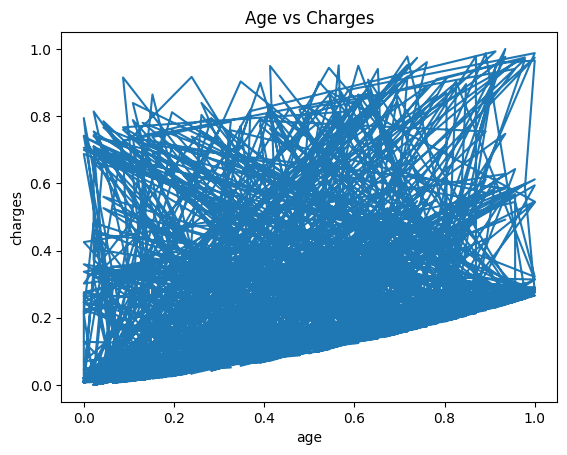

In [23]:
plt.plot(df_scaled['age'], df_scaled['charges'])
plt.xlabel('age')
plt.ylabel("charges")
plt.title('Age vs Charges')
plt.show()
#aparently age is just a number here

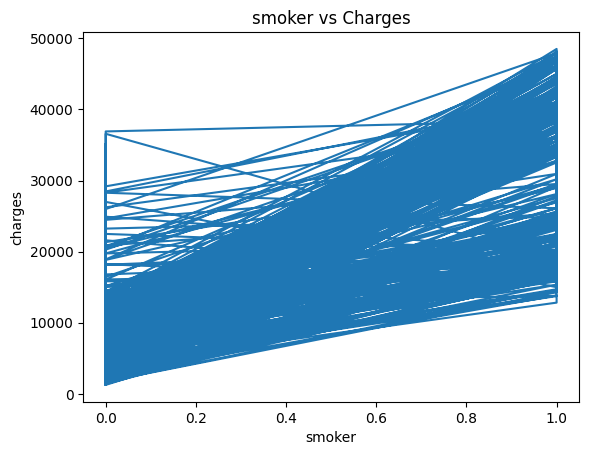

In [24]:
plt.plot(df_filtered['bsmoker'], df_filtered['charges'])
plt.xlabel('smoker')
plt.ylabel("charges")
plt.title('smoker vs Charges')
plt.show()
#kids dont smoke you may just get lower charges

In [25]:
X = df_filtered.drop('charges', axis = 1)
y = df_filtered['charges']#one with ane another withouht charges

In [26]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 123)#splitting data

In [27]:
model = RandomForestClassifier()
#defining model

In [28]:

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#scaling data cause age is like [70,60] but the smoker is in 0 and 1


In [49]:
from sklearn.metrics import accuracy_score

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
#accuracy after removing outliers :(

Accuracy: 0.011450381679389313


In [50]:
model1 = GaussianNB()

In [51]:
from sklearn.metrics import accuracy_score

model1.fit(X_train_scaled, y_train)

y_pred = model1.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
#bruh

Accuracy: 0.0


In [52]:
data_dict =  df_filtered.to_dict(orient='records')
#aparently cannot cuse data frame for hyperparamters so coverted it into dict

In [53]:
# Define the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# tried using cv=2-5 but none worked so gpt told me to go with this
stratified_cv = StratifiedKFold(n_splits=2)
grid_search = GridSearchCV(model, param_grid, cv=stratified_cv, scoring='accuracy')


grid_search.fit(X, y)

# Got the best param and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model: RandomForestClassifier(max_depth=10, n_estimators=200)


In [54]:
Best_Hyperparameters={'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [55]:
best_model = RandomForestClassifier(**Best_Hyperparameters)
#putting hyperparamters to RFC

In [57]:
from sklearn.metrics import accuracy_score

best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
#BRUH

Accuracy: 0.011450381679389313


In [58]:
new_data = pd.DataFrame({'age': [61,67,18],'bmi': [33.33,19.27,23],'children':[4,3,2],'regionnu':[1,3,2],'bSex': [1,0,0],'bsmoker':[0,1,1]})


new_data_scaled = scaler.transform(new_data)


prediction = best_model.predict(new_data_scaled)


print("charge prediction is", prediction)
#tried putting in some data frame for jokes

charge prediction is [36580 24869 12829]


THATS IT...

Cant get good **accuracy** tried **removing** outliers tried *hyperparamters* and shit somehow charges is ***insanely*** corelated to **smoker** or not damnn man this is sorta **fustrating** and indeed hella **fun** ..

---

